# Load status prediction model

In [1]:
from src.loanprediction import LoanPrediction
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import os

## Load data and configuration file
The `config.json` file contains all the parameters needed to train and evaluate the model. Customized parameters can be changed in this file. There is no need to change the code directly. 

In [2]:
loan_pred = LoanPrediction()
loan_pred.load_config('config.json')

## Read input data, clean data and perform data exploration

In [3]:
loan_pred.read_data()
loan_pred.preprocess_data()
loan_pred.data_exploration()

## Build XGBoost classification model

In [4]:
clf = xgb.XGBClassifier(n_estimators=100)
loan_pred.train_and_test_model(clf, loan_pred.json_input['xgb_grid_search_params'])
loan_pred.model_eval('xgboost')

Plot feature importance

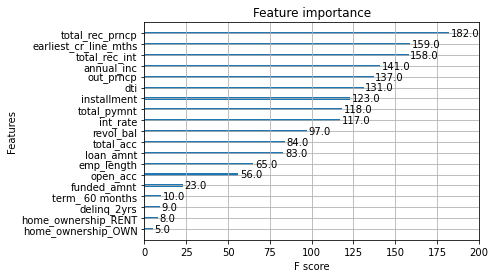

<Figure size 432x288 with 0 Axes>

In [5]:
xgb.plot_importance(loan_pred.clf_best)
plt.show()
res_figure_path = os.path.join(loan_pred.res_path, 'figures')
plt.savefig(os.path.join(res_figure_path, f'feature_importance.png'))

## Build Ridge regression model

In [6]:
clf = LogisticRegression(penalty='l2', max_iter=10000)
loan_pred.train_and_test_model(clf, loan_pred.json_input['ridge_grid_search_params'])
loan_pred.model_eval('ridge')